
<img src="jenga-logo.png">


## PROJECT PROPOSAL
<div style="background-color:#DE3163"> 
 <h2>Purpose and motivation.</h2>
    </div>

The purpose and motivation for choosing to pursue this project was based on recent interactions that I have had with students that have applied to take the courses we offer here at JENGA School namely;
1.	Python programming for all.
2.	Foundations in data science.
3.	Advanced data science.
4.	Software engineering professional accelerator.

<div style="background-color:#E9967A"> 
 <h2>Objectives</h2>
    </div>

My main aim was to analyze and look at the applications that we received from the intake. With this data I want to know; 

1. How the gender is distributed per program applied?
2. The level of education of the applicants when applying for the program?
3. The program with the highest number of applicants?
4. The current status of the students while applying for the programs?
5. Where the applicants learnt about us?

# Overview of the dataset

The following is the overview of my dataset.

<img src="Data1.png" >

## DATA PREPROCESSING
1. Loading data & dropping columns with sensitive information(FullName,FirstName,Last Name,Email,Phone)
2. Dropping blank columns.
3. Removal of duplicates.
4. Encoding the data(Changing it from non-numeric to numeric values)




<div style="background-color:#FF5733 "> 
 <h2>Loading data & dropping columns with sensitive information (FullName, FirstName,Last Name, Email, Phone).</h2>
    </div>

In [6]:
#In this case I dropped the data with the senstitive information and also columns that are blank-Full name,First Name,Last Name,Email,Phone,Country,Who will be paying your tuition fee?,Name of Company,Contact Person,Name of Parent,parent's Email,Parent's phone,
#Intake Month,PPA Intake,Course of study,University,University/Institution Attended,Current Occupation,Select,Organisation,Referred by?,Application Date,Application Month,Contacted.
#In total the total columns dropped were 24.

import numpy as np
import pandas as pd
import re
df= pd.read_csv(r"C:\Users\USER\Applications.csv")
df.drop(df.columns[[0,1,2,4,5,6,7,8,9,10,11,12,14,15,17,18,19,21,23,24,25,26,27,28]], axis=1, inplace=True)
df.head(10)



,Gender,Program Applying,Level of Education,Learnt About Us,Current Status
0,Male,Advanced Data Science & AI,Masters,Linkedin,Part-Time Employee
1,Female,Foundations in Data Science,Bachelors,Whatsapp,Student
2,Female,Foundations in Data Science,Bachelors,A friend Referral,Full-Time Employee
3,Male,Foundations in Data Science,Bachelors,Linkedin,Full-Time Employee
4,Male,Advanced Data Science & AI,Bachelors,Jenga Staff,Full-Time Employee
5,Male,Foundations in Data Science,Bachelors,Linkedin,Student
6,Female,Advanced Data Science & AI,Bachelors,Linkedin,Unemployed
7,Male,Advanced Data Science & AI,Bachelors,Google Search,Full-Time Employee
8,Male,Advanced Data Science & AI,Diploma,Linkedin,Full-Time Employee
9,Male,Foundations in Data Science,Diploma,A friend Referral,Unemployed


In [7]:
#df has 2008 rows and 5 columns
df.shape

(2008, 5)

In [8]:
df.sum()

Gender                MaleFemaleFemaleMaleMaleMaleFemaleMaleMaleMale...
Program Applying      Advanced Data Science & AIFoundations in Data ...
Level of Education    MastersBachelorsBachelorsBachelorsBachelorsBac...
Learnt About Us       LinkedinWhatsappA friend ReferralLinkedinJenga...
Current Status        Part-Time EmployeeStudentFull-Time EmployeeFul...
dtype: object

<div style="background-color:#FF5733"> 
 <h2>Standardization.</h2>
    </div>


In [9]:
#The column Leant about us has two similar values that is 'A friend referral' and 'Friend refferral' which are similar but have different spellings. They need to be replaced into one word 'Friend'
import pandas as pd

# read in the CSV file
df = pd.read_csv(r"C:\Users\USER\Applicants.csv")

# replace "Friend referral" and "A friend Referral" with "Friend Referral" in the "Learnt About Us" column
df['Learnt About Us'] = df['Learnt About Us'].replace(['Friend Referral', 'A friend Referall'], 'Friend')

# display the updated DataFrame
df.tail(10)



,Gender,Program Applying,Level of Education,Learnt About Us,Current Status
1998,Female,Foundations in Data Science,Diploma,Linkedin,Part-Time Employee
1999,Female,Foundations in Data Science,Diploma,Google Search,Part-Time Employee
2000,Male,Advanced Data Science & AI,Bachelors,Friend,Full-Time Employee
2001,Male,Foundations in Data Science,High School Certificate,Email,Unemployed
2002,Female,Foundations in Data Science,High School Certificate,Google Search,Student
2003,Male,Advanced Data Science & AI,Bachelors,Whatsapp,Full-Time Employee
2004,Male,Software Engineering Professional Accelerator,Bachelors,Whatsapp,Full-Time Employee
2005,Male,Foundations in Data Science,Masters,Friend,Full-Time Employee
2006,Female,Foundations in Data Science,Diploma,Google Search,Unemployed
2007,Male,Software Engineering Professional Accelerator,Bachelors,Whatsapp,Part-Time Employee


<div style="background-color:#FF5733"> 
 <h2>Renaming the columns.</h2>
    </div>

In [10]:
#Renaming the columns

df.rename(columns={"Program Applying": "Program_Applying","Level of Education": "Education_Level","Learnt About Us":"Learnt_About_Us","Current Status":"Current_Status"}, inplace=True)

In [11]:
# summary of the numerical columns in the DataFrame df.
df.describe()


,Gender,Program_Applying,Education_Level,Learnt_About_Us,Current_Status
count,2008,2008,2008,2008,2008
unique,3,4,6,14,6
top,Male,Foundations in Data Science,Bachelors,Google Search,Student
freq,1273,721,1324,654,593


<div style="background-color:#FF5733"> 
 <h2>Looking for missing values</h2>
    </div>


In [12]:
# Count the number of missing values for each column
df.isnull().sum()

Gender              0
Program_Applying    0
Education_Level     0
Learnt_About_Us     0
Current_Status      0
dtype: int64

In [13]:
# information about the DataFrame df, including the data types of each column, the number of non-null values in each column, and the memory usage of the DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2008 entries, 0 to 2007
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Gender            2008 non-null   object
 1   Program_Applying  2008 non-null   object
 2   Education_Level   2008 non-null   object
 3   Learnt_About_Us   2008 non-null   object
 4   Current_Status    2008 non-null   object
dtypes: object(5)
memory usage: 78.6+ KB


<div style="background-color:#0B9B6B"> 
 <h2>Data visualization and analysis</h2>
    </div>


# How the gender is distributed per program applied?

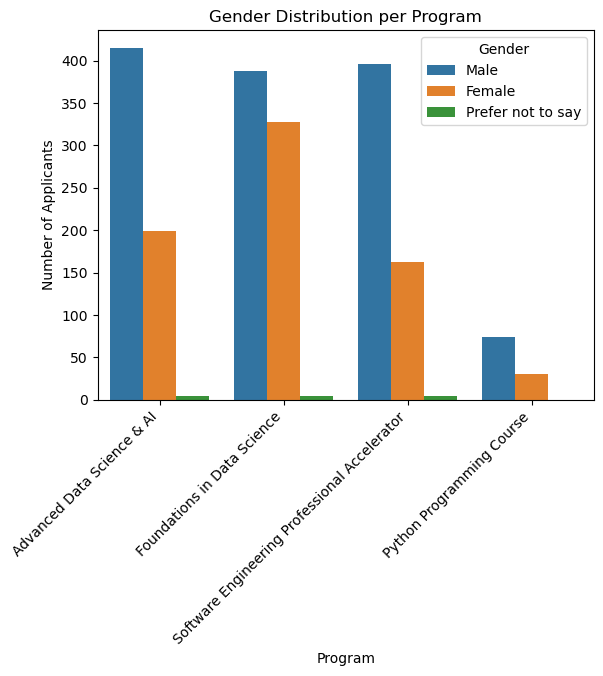

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# The sns.countplot() function creates a bar plot where the x-axis shows the different programs that people have applied for.
# The height of the bars shows the count of the number of applicants for each program. 
# The hue parameter is used to group the bars by gender, with each gender being represented by a different color.
sns.countplot(data=df, x='Program_Applying', hue='Gender')
sns.countplot(data=df, x='Program_Applying', hue='Gender')
plt.xlabel('Program') # The plt.xlabel(), plt.ylabel(), and plt.title() functions are used to label the x-axis, y-axis, and title of the plot, respectively. 
plt.ylabel('Number of Applicants')
plt.title('Gender Distribution per Program')
plt.xticks(rotation=45, ha='right') # rotates the x-axis labels by 45 degrees and aligns them to the right for better readability.
plt.show()

# The level of education of the applicants when applying for the program?

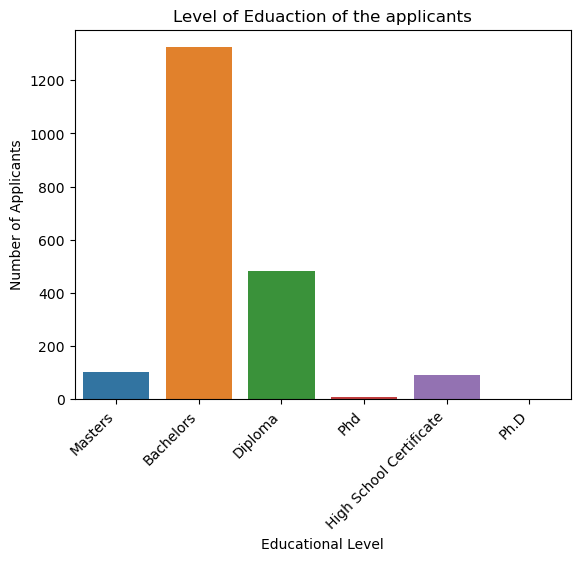

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='Education_Level')
plt.xlabel('Educational Level')
plt.ylabel('Number of Applicants')
plt.title('Level of Eduaction of the applicants')
plt.xticks(rotation=45, ha='right')
plt.show()

# Where the applicants learnt about us?

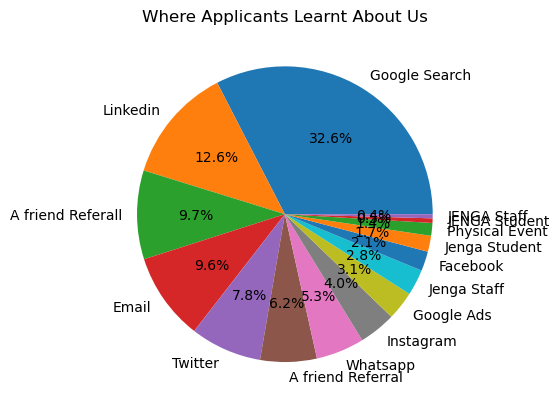

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# The value_counts() function is applied on the 'Learnt About Us' column of the DataFrame df to get the count of applicants for each source. 
# The resulting counts are stored in the variable counts.
# The plt.pie() function creates a pie chart where the values parameter is set to the values in counts.values and the labels parameter is set to the index of counts.
counts = df['Learnt About Us'].value_counts()
plt.pie(counts.values, labels=counts.index, autopct='%1.1f%%') # The autopct parameter formats the values in the chart to display them as percentages.
plt.title('Where Applicants Learnt About Us')
plt.show()


# The program with the highest number of applicants?

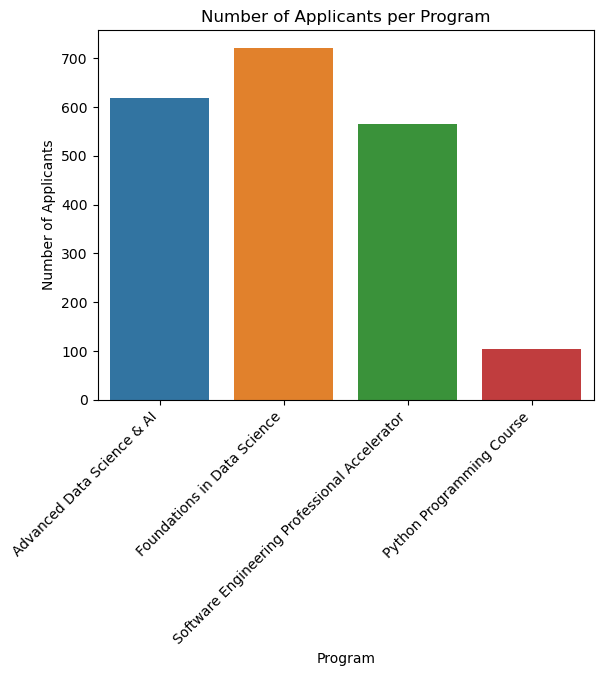

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='Program Applying')
plt.xlabel('Program')
plt.ylabel('Number of Applicants')
plt.title('Number of Applicants per Program')
plt.xticks(rotation=45, ha='right')
plt.show()

#  The current status of the students while applying for the programs?

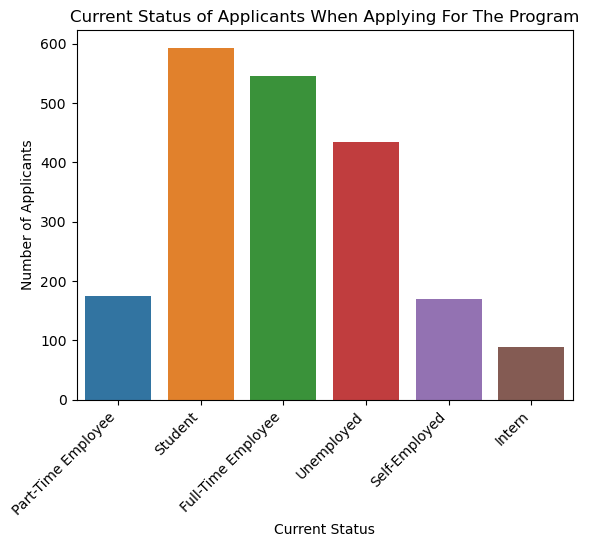

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='Current Status')
plt.xlabel('Current Status')
plt.ylabel('Number of Applicants')
plt.title('Current Status of Applicants When Applying For The Program')
plt.xticks(rotation=45, ha='right')
plt.show()


<div style="background-color:#FF5733"> 
 <h2>Encoding data using label encoder (Current Status,Level of Education,Gender,Programs).</h2>
    </div>

In [145]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Create a Pandas DataFrame df that contains information about applicants such as their current status, gender, program they are applying for, education level, and how they learnt about the organization.

df = pd.DataFrame({
    'Current_Status': ['Unemployed', 'Full-Time Employee', 'Part-Time Employee', 'Self-Employed', 'Student', 'Intern',None,None,None,None,None,None],
    'Gender': ['Male','Female','Prefer not to say',None,None,None,None,None,None,None,None,None],
    'Program_Applying': ['Foundations in Data Science', 'Python Programming Course', 'Advanced Data Science & AI', 'Software Engineering Professional Accelerator',None,None,None,None,None,None,None,None],
    'Education_Level': ['High School', 'Certificate', 'Bachelors', 'Diploma','Masters','Phd',None,None,None,None,None,None],
    'Learnt_About_Us': ['Linkedin','Whatsapp','Friends','Google Search','Email','Facebook','Google Ads','Instagram','Jenga Staff','Twitter','Jenga Student','Physical Event']
})

# Replace null values with the most frequent value in the column
df = df.fillna(df.mode().iloc[0]) # fillna() function is used to replace the null values in the DataFrame with the most frequent value in the respective column. This ensures that the data is properly cleaned and formatted. 

# The LabelEncoder() function from Scikit-learn library is used to encode the categorical variables in the DataFrame to numerical values.
# The encoded variables are stored in new columns that are appended to the DataFrame with the suffix _Encoded.
le = LabelEncoder() 
df['Current_Status_Encoded'] = le.fit_transform(df['Current_Status'])
df['Gender_Encoded'] = le.fit_transform(df['Gender'])
df['Program_Applying_Encoded'] = le.fit_transform(df['Program_Applying'])
df['Education_Level_Encoded'] = le.fit_transform(df['Education_Level'])
df['Learnt_About_Us_Encoded'] = le.fit_transform(df['Learnt_About_Us'])
df.head(10)


,Current_Status,Gender,Program_Applying,Education_Level,Learnt_About_Us,Current_Status_Encoded,Gender_Encoded,Program_Applying_Encoded,Education_Level_Encoded,Learnt_About_Us_Encoded
0,Unemployed,Male,Foundations in Data Science,High School,Linkedin,5,1,1,3,8
1,Full-Time Employee,Female,Python Programming Course,Certificate,Whatsapp,0,0,2,1,11
2,Part-Time Employee,Prefer not to say,Advanced Data Science & AI,Bachelors,Friends,2,2,0,0,2
3,Self-Employed,Female,Software Engineering Professional Accelerator,Diploma,Google Search,3,0,3,2,4
4,Student,Female,Advanced Data Science & AI,Masters,Email,4,0,0,4,0
5,Intern,Female,Advanced Data Science & AI,Phd,Facebook,1,0,0,5,1
6,Full-Time Employee,Female,Advanced Data Science & AI,Bachelors,Google Ads,0,0,0,0,3
7,Full-Time Employee,Female,Advanced Data Science & AI,Bachelors,Instagram,0,0,0,0,5
8,Full-Time Employee,Female,Advanced Data Science & AI,Bachelors,Jenga Staff,0,0,0,0,6
9,Full-Time Employee,Female,Advanced Data Science & AI,Bachelors,Twitter,0,0,0,0,10


In [147]:
 df.columns

Index(['Current_Status', 'Gender', 'Program_Applying', 'Education_Level',
       'Learnt_About_Us', 'Current_Status_Encoded', 'Gender_Encoded',
       'Program_Applying_Encoded', 'Education_Level_Encoded',
       'Learnt_About_Us_Encoded'],
      dtype='object')

<div style="background-color:#0B9B6B"> 
 <h2>Correlation matrix.</h2>
    </div>

<AxesSubplot:>

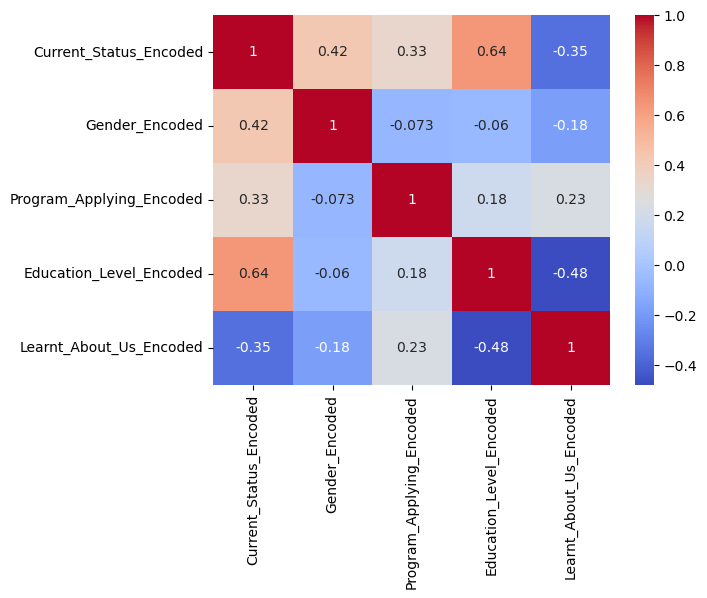

In [148]:
import seaborn as sns

# compute correlation matrix of encoded categorical variables
corr_matrix = df[['Current_Status_Encoded','Gender_Encoded','Program_Applying_Encoded','Education_Level_Encoded','Learnt_About_Us_Encoded']].corr()

# create heatmap of correlation matrix
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)

#In this case, cmap='coolwarm' sets the color map to be blue for negative correlations and red for positive correlations, and annot=True displays the correlation coefficients on the heatmap.
# positive correlations (shown in shades of red) indicate that the variables tend to increase or decrease together, while negative correlations (shown in shades of blue) indicate that the variables tend to move in opposite directions.

## Conclusions and recommendations
1. Students are the highest number of applicants.
2. The program with the highest number of applicants was foundations program.
3. Most of the students that applied came from google search.
4. The male gender was the highest in programs applied.

## Recommendations 
1. Promote campus campaigns to attract more students.
2. Invest more on SEO.
3. Promote and encourage more women to apply for the programs